In [1]:
import numpy as np
from scipy.special import iv
import timeit
import viscid_mat
import imp
from scipy.linalg import eig
import matplotlib.pyplot as plt
import json

In [44]:
filebase='auto'
argsdict=json.load(open(filebase+'argsdict.json'))

In [45]:
f=np.loadtxt(filebase+'u.txt')
n = 2*(2*argsdict['Nx']+1)*(2*argsdict['Nt']+1)
v=(f[:n]+1j*f[n:2*n]).reshape((2,(2*argsdict['Nx']+1),(2*argsdict['Nt']+1)))
# w=(f[2*n:3*n]+1j*f[3*n:4*n]).reshape((2,(2*argsdict['Nx']+1),(2*argsdict['Nt']+1)))
omega=f[2*n]+1j*f[2*n+1]
E_n=viscid_mat.viscid_mat(omega, argsdict)
dE=(viscid_mat.viscid_mat(omega+argsdict['domega_fd'],argsdict)-E_n)/argsdict['domega_fd']
print(np.linalg.norm(np.einsum("kKlLmM,KLM",E_n,v)))
print(v[0,argsdict['Nx'],argsdict['Nt']])

1.7784640399741854e-06
(0.02062001+1.361624e-23j)


In [47]:
omega

(14.45278+1.209825j)

In [12]:
u=np.loadtxt(argsdict['filebase']+'u.txt')
n = 2*(2*argsdict['Nx']+1)*(2*argsdict['Nt']+1)
v=(u[:n]+1j*u[n:2*n]).reshape((2,(2*argsdict['Nx']+1),(2*argsdict['Nt']+1)))
omega=u[2*n]+1j*u[2*n+1]
print(omega)
E=viscid_mat.viscid_mat(omega, argsdict)
f1=np.einsum("kKlLmM,KLM",E,v)
n1=np.linalg.norm(v)**2-1
n2=np.imag(v[0,argsdict['Nx'],argsdict['Nt']])
f=np.concatenate([np.real(f1.reshape(np.product(f1.shape))),np.imag(f1.reshape(np.product(f1.shape))),[n1],[n2]])
print(np.linalg.norm(f))

(14.452779170088588+1.2098242685962886j)
2.4761063179138895e-15


In [13]:
jac=np.zeros((2*n+2,2*n+2))
h=1e-8;

for ind in range(n):
    print(ind,n,end='\r')
    u=np.loadtxt(argsdict['filebase']+'u.txt')
    n = 2*(2*argsdict['Nx']+1)*(2*argsdict['Nt']+1)
    v=(u[:n]+1j*u[n:2*n]).reshape((2,(2*argsdict['Nx']+1),(2*argsdict['Nt']+1)))

    v=v.reshape((n))
    v[ind]=v[ind]+h
    v=v.reshape((2,(2*argsdict['Nx']+1),(2*argsdict['Nt']+1)))

    omega=u[2*n]+1j*u[2*n+1]
    E=viscid_mat.viscid_mat(omega, argsdict)
    f1=np.einsum("kKlLmM,KLM",E,v)
    n1=np.linalg.norm(v)**2-1
    n2=np.imag(v[0,argsdict['Nx'],argsdict['Nt']])
    f_fd=np.concatenate([np.real(f1.reshape(np.product(f1.shape))),np.imag(f1.reshape(np.product(f1.shape))),[n1],[n2]])
    jac[ind]=(f_fd-f)/h
    
    u=np.loadtxt(argsdict['filebase']+'u.txt')
    n = 2*(2*argsdict['Nx']+1)*(2*argsdict['Nt']+1)
    v=(u[:n]+1j*u[n:2*n]).reshape((2,(2*argsdict['Nx']+1),(2*argsdict['Nt']+1)))

    v=v.reshape((n))
    v[ind]=v[ind]+1j*h
    v=v.reshape((2,(2*argsdict['Nx']+1),(2*argsdict['Nt']+1)))

    omega=u[2*n]+1j*u[2*n+1]
    E=viscid_mat.viscid_mat(omega, argsdict)
    f1=np.einsum("kKlLmM,KLM",E,v)
    n1=np.linalg.norm(v)**2-1
    n2=np.imag(v[0,argsdict['Nx'],argsdict['Nt']])
    f_fd=np.concatenate([np.real(f1.reshape(np.product(f1.shape))),np.imag(f1.reshape(np.product(f1.shape))),[n1],[n2]])
    jac[n+ind]=(f_fd-f)/h

h=1e-6;
u=np.loadtxt(argsdict['filebase']+'u.txt')
n = 2*(2*argsdict['Nx']+1)*(2*argsdict['Nt']+1)
v=(u[:n]+1j*u[n:2*n]).reshape((2,(2*argsdict['Nx']+1),(2*argsdict['Nt']+1)))

omega=u[2*n]+1j*u[2*n+1]+h
E=viscid_mat.viscid_mat(omega, argsdict)
f1=np.einsum("kKlLmM,KLM",E,v)
n1=np.linalg.norm(v)**2-1
n2=np.imag(v[0,argsdict['Nx'],argsdict['Nt']])
f_fd=np.concatenate([np.real(f1.reshape(np.product(f1.shape))),np.imag(f1.reshape(np.product(f1.shape))),[n1],[n2]])
jac[2*n]=(f_fd-f)/h

omega=u[2*n]+1j*u[2*n+1]+1j*h
E=viscid_mat.viscid_mat(omega, argsdict)
f1=np.einsum("kKlLmM,KLM",E,v)
n1=np.linalg.norm(v)**2-1
n2=np.imag(v[0,argsdict['Nx'],argsdict['Nt']])
f_fd=np.concatenate([np.real(f1.reshape(np.product(f1.shape))),np.imag(f1.reshape(np.product(f1.shape))),[n1],[n2]])
jac[2*n+1]=(f_fd-f)/h


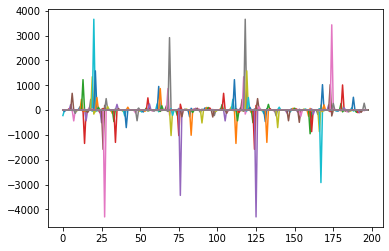

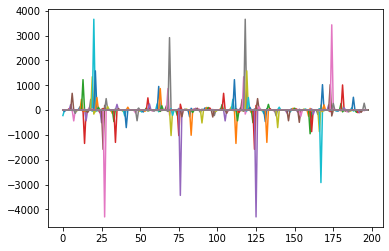

9.818814252788473e-05


In [15]:
J=np.loadtxt(argsdict['filebase']+'J.txt')

plt.plot(J)
plt.show()
plt.plot(jac)
plt.show()
print(np.linalg.norm(J-jac))

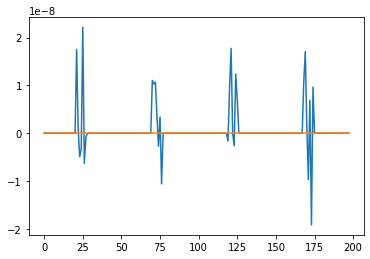

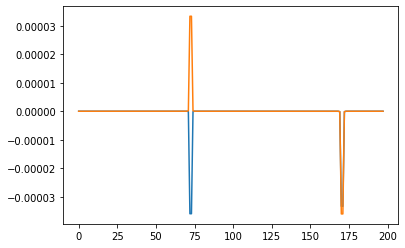

In [16]:
plt.plot(jac[:,-2:]-J[:,-2:])
plt.show()
plt.plot(jac[-2:].T-J[-2:].T)
plt.show()

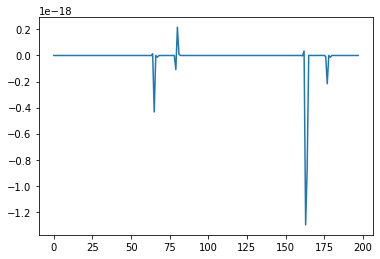

In [20]:
Jp=np.loadtxt(filebase+'Jp.txt')

h=1e-6;
u=np.loadtxt(argsdict['filebase']+'u.txt')
n = 2*(2*argsdict['Nx']+1)*(2*argsdict['Nt']+1)
v=(u[:n]+1j*u[n:2*n]).reshape((2,(2*argsdict['Nx']+1),(2*argsdict['Nt']+1)))

omega=u[2*n]+1j*u[2*n+1]
ad0=argsdict['ad']
argsdict['ad']=argsdict['ad']+h
E=viscid_mat.viscid_mat(omega, argsdict)
f1=np.einsum("kKlLmM,KLM",E,v)
n1=np.linalg.norm(v)**2-1
n2=np.imag(v[0,argsdict['Nx'],argsdict['Nt']])
f_fd=np.concatenate([np.real(f1.reshape(np.product(f1.shape))),np.imag(f1.reshape(np.product(f1.shape))),[n1],[n2]])

argsdict['ad']=ad0
plt.plot((f_fd-f)/h-Jp)
plt.show()

In [29]:
from scipy.linalg import null_space
print(null_space(J).shape)
print(null_space(np.concatenate([J,Jp[np.newaxis,:]])).shape)
print(null_space(np.concatenate([J,Jp[np.newaxis,:]]).T).shape)

(198, 0)
(198, 0)
(199, 1)


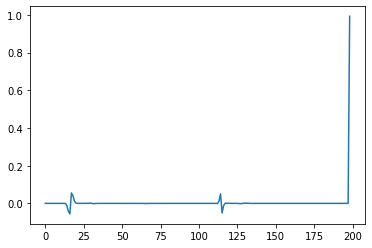

In [36]:
from scipy.linalg import null_space 
J=np.loadtxt(argsdict['filebase']+'J.txt')
Jp=np.loadtxt(argsdict['filebase']+'Jp.txt')
udot=null_space(np.concatenate([J.T,Jp[np.newaxis,:]]).T)
plt.plot(udot)
plt.show()

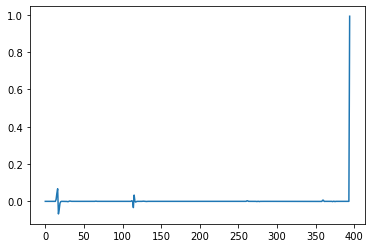

In [134]:
jac=np.loadtxt('jac.test3').reshape((4*n+3,4*n+3))
plt.plot(null_space(jac[:-1,:]))

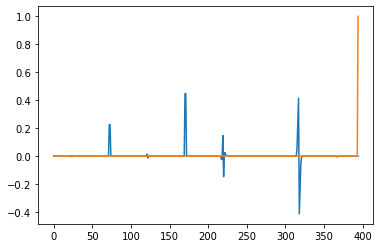

In [136]:
jac2=np.concatenate([J,Jp[np.newaxis,:]]).T
plt.plot(null_space(jac2[:-1,:]))

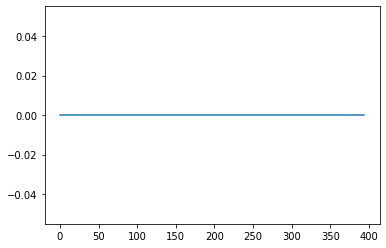

In [131]:
plt.plot(jac[-1])

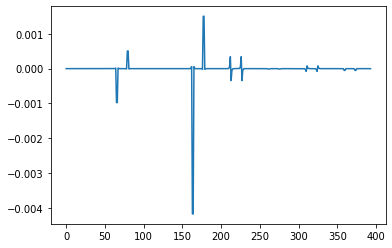

In [130]:
plt.plot(np.concatenate([J,Jp[np.newaxis,:]])[-1])

In [186]:
evals=np.load('evals.npy')
ads=np.load('ads.npy')

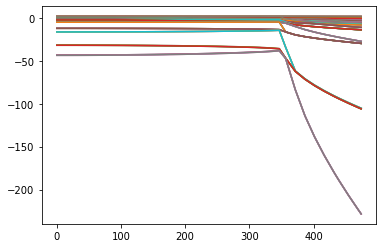

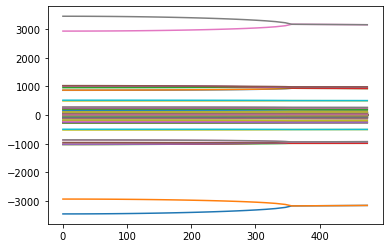

In [159]:
plt.plot(ads,evals[:,:,0])
plt.show()
plt.plot(ads,np.sort(evals[:,:,1],axis=1))
plt.show()

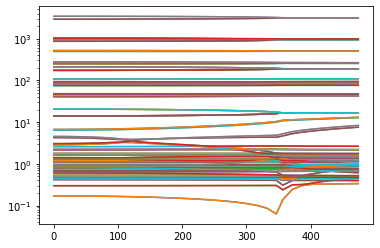

In [160]:
plt.plot(ads,np.sort((evals[:,:,0]**2+evals[:,:,1]**2)**0.5))
plt.yscale('log')
plt.show()

In [161]:
minds=np.argsort((evals[:,:,0]**2+evals[:,:,1]**2)**0.5,axis=1)

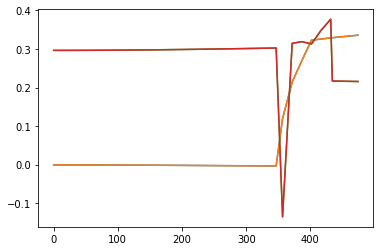

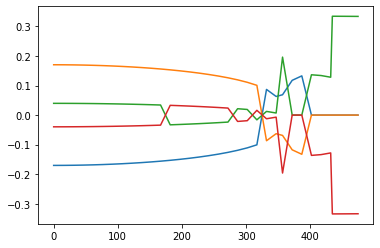

In [162]:
for i in range(4):
    plt.plot(ads,evals[:,:,0][np.arange(len(minds)),minds[:,i]])
plt.show()
for i in range(4):
    plt.plot(ads,evals[:,:,1][np.arange(len(minds)),minds[:,i]])
plt.show()

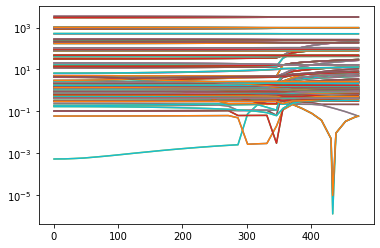

In [165]:
plt.plot(ads,np.abs(evals[:,:,0]))
plt.yscale('log')
plt.plot(ads,np.sort((evals[:,:,0]**2+evals[:,:,1]**2)**0.5))

plt.show()


In [229]:
us=np.load('us.npy')
ind=np.argmin(np.min(np.sort((evals[:,:,0]**2+evals[:,:,1]**2)**0.5),axis=1))
print(ind,ads[ind])
np.savetxt('autou.txt',us[ind,:,0])

24 346.5962696


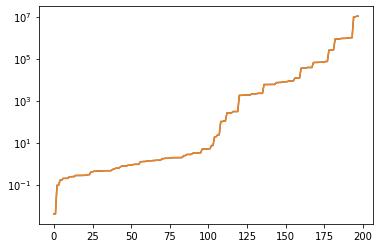

In [209]:
J=np.loadtxt(argsdict['filebase']+'J.txt')
Jp=np.loadtxt(argsdict['filebase']+'Jp.txt')

e,v=np.linalg.eig(J)
plt.plot(np.sort(np.abs(e)**2))
plt.plot(np.sort(evals[24,:,0]**2+evals[24,:,1]**2))
plt.yscale('log')

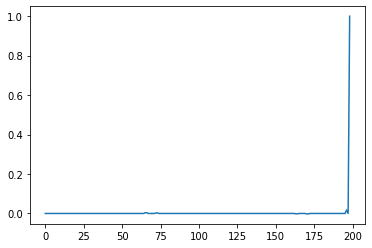

In [214]:
udot=null_space(np.concatenate([J,Jp[np.newaxis,:]]).T)

plt.plot(udot)

In [223]:
tevals,tevecs=np.linalg.eig(np.vstack([np.concatenate([J,Jp[np.newaxis,:]]).T,udot.T]))

In [219]:
udot.shape

(199, 1)

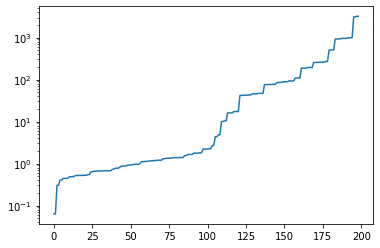

In [228]:
plt.plot(np.sort(np.abs(tevals)))
plt.yscale('log')

In [230]:
E=viscid_mat.viscid_mat(omega, argsdict)

In [231]:
E.shape

(2, 2, 7, 7, 7, 7)

In [241]:
us=np.load("us.npy")
ads=np.load("ads.npy")
us2=np.load("us2.npy")
ads2=np.load("ads2.npy")

In [238]:
us.shape

(37, 198, 1)

In [239]:
us2.shape

(37, 198, 1)

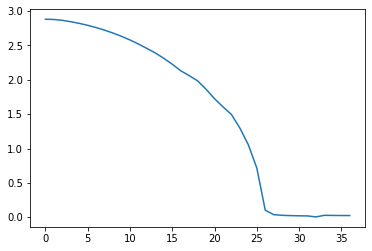

In [245]:
plt.plot(np.linalg.norm(us-us2,axis=1))

In [246]:
np.random.normal(size=E.shape)

array([[[[[[-1.87606452e+00,  8.63051544e-01, -7.40575695e-01, ...,
             9.26447330e-01, -9.89855867e-03, -1.47458631e+00],
           [-1.85857042e+00, -8.75426077e-02, -1.18379871e+00, ...,
            -8.79628037e-02,  1.01026286e+00,  7.32300552e-01],
           [-1.16497488e+00,  6.04834655e-01, -1.75787189e+00, ...,
            -8.28917387e-01, -9.55707166e-02,  1.60923967e+00],
           ...,
           [-6.52463823e-01, -2.30167058e-01, -1.69244873e+00, ...,
             8.26796423e-01,  2.09743317e-01,  5.89358601e-01],
           [ 1.22154162e+00,  1.36590048e+00,  9.64413965e-01, ...,
            -4.66330523e-01, -3.92326176e-01, -1.67464887e+00],
           [-8.45510243e-01,  5.44742719e-01, -4.18910535e-01, ...,
            -7.71646462e-01,  3.41449526e-01, -1.16848471e+00]],

          [[-9.43589326e-01,  1.79810220e+00, -1.09901650e+00, ...,
            -5.53266853e-01,  5.18914613e-01, -4.78077248e-01],
           [ 1.95795599e+00,  2.52273709e-01,  9.66850880e